# Tag 3. Kapitel 13. R Tests

## Lektion 63. Survival Tests

In [3]:
# Pakete installiern
install.packages(c('survival','ranger', 'ggplot2', 'dplyr', 'ggfortify'))

also installing the dependencies 'RcppEigen', 'gridExtra'

Warning message:
"package 'survival' is in use and will not be installed"

package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'ranger' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Users\dm_78\.conda\envs\R Universe\Lib\R\library\00LOCK\dplyr\libs\x64\dplyr.dll nach C:\Users\dm_78\.conda\envs\R Universe\Lib\R\library\dplyr\libs\x64\dplyr.dll zu kopieren: Permission denied"Warning message:
"restored 'dplyr'"

package 'ggfortify' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dm_78\AppData\Local\Temp\RtmpC0HsSR\downloaded_packages


In [2]:
# Bibliotheken laden
library(survival)
library(ranger)
library(ggplot2)
library(dplyr)
library(ggfortify)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
# Untersuchten Daten
data(veteran)
head(veteran)
help(veteran)

trt,celltype,time,status,karno,diagtime,age,prior
1,squamous,72,1,60,7,69,0
1,squamous,411,1,70,5,64,10
1,squamous,228,1,60,3,38,0
1,squamous,126,1,60,9,63,10
1,squamous,118,1,70,11,65,10
1,squamous,10,1,20,5,49,0


### Kaplan-Meier Analyse

Das erste, was Sie tun müssen, ist die Verwendung von **Surv()** , um das Standardüberlebensobjekt zu erstellen. Die variable time zeichnet die Überlebenszeit auf; status gibt an, ob der Tod des Patienten beobachtet wurde ( status = 1 ) oder ob die Überlebenszeit zensiert wurde ( status = 0 ). Beachten Sie, dass ein „+“ nach der Zeit im Ausdruck von km eine Zensur anzeigt.

In [4]:
# Kaplan Meier Survival Curve
km <- with(veteran, Surv(time, status))
head(km,80)

 [1]  72  411  228  126  118   10   82  110  314  100+  42    8  144   25+  11 
[16]  30  384    4   54   13  123+  97+ 153   59  117   16  151   22   56   21 
[31]  18  139   20   31   52  287   18   51  122   27   54    7   63  392   10 
[46]   8   92   35  117  132   12  162    3   95  177  162  216  553  278   12 
[61] 260  200  156  182+ 143  105  103  250  100  999  112   87+ 231+ 242  991 
[76] 111    1  587  389   33 

Zu Beginn unserer Analyse verwenden wir die Formel Surv(futime, status) ~ 1 und die Funktion survfit() , um die [Kaplan-Meier- Schätzungen](https://en.wikipedia.org/wiki/Kaplan%E2%80%93Meier_estimator) der Überlebenswahrscheinlichkeit über die Zeit zu erstellen. Mit dem times Parameter der summary() -Funktion können Sie steuern, welche Zeiten gedruckt werden sollen. Hier wird festgelegt, dass die Schätzungen für 1, 30, 60 und 90 Tage und danach alle 90 Tage gedruckt werden. Dies ist das einfachste mögliche Modell. Es sind nur drei Zeilen R-Code erforderlich, um es anzupassen und numerische und grafische Zusammenfassungen zu erstellen.

Call: survfit(formula = Surv(time, status) ~ 1, data = veteran)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1    137       2    0.985  0.0102      0.96552       1.0000
   30     97      39    0.700  0.0392      0.62774       0.7816
   60     73      22    0.538  0.0427      0.46070       0.6288
   90     62      10    0.464  0.0428      0.38731       0.5560
  180     27      30    0.222  0.0369      0.16066       0.3079
  270     16       9    0.144  0.0319      0.09338       0.2223
  360     10       6    0.090  0.0265      0.05061       0.1602
  450      5       5    0.045  0.0194      0.01931       0.1049
  540      4       1    0.036  0.0175      0.01389       0.0934
  630      2       2    0.018  0.0126      0.00459       0.0707
  720      2       0    0.018  0.0126      0.00459       0.0707
  810      2       0    0.018  0.0126      0.00459       0.0707
  900      2       0    0.018  0.0126      0.00459       0.0707

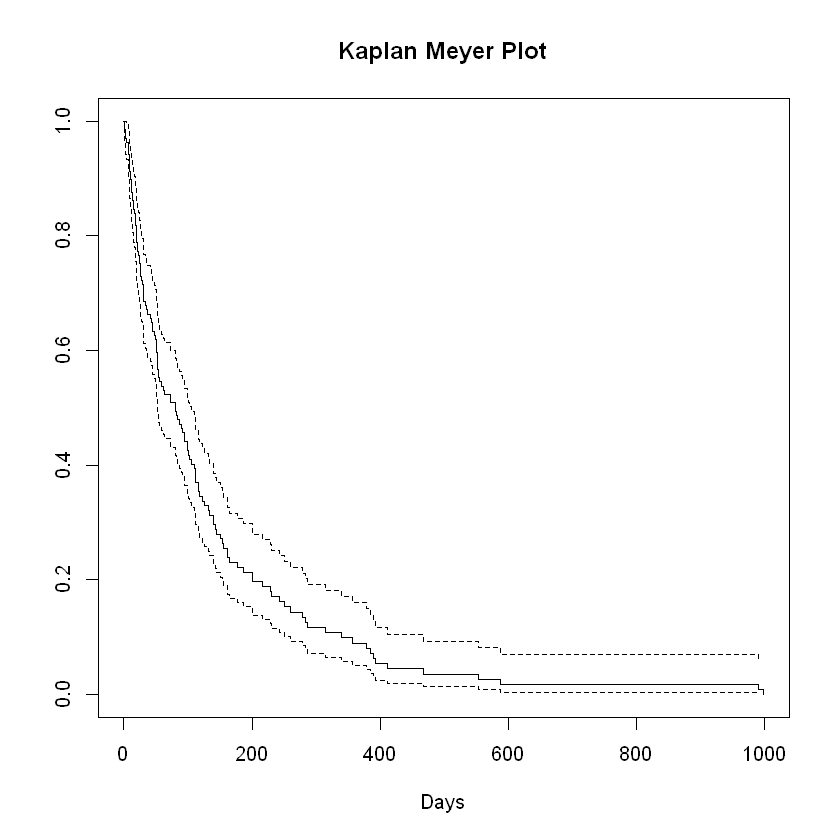

In [7]:
km_fit <- survfit(Surv(time, status) ~ 1, data=veteran) 
summary(km_fit, times = c(1,30,60,90*(1:10)))
plot(km_fit, xlab="Days", main = 'Kaplan Meyer Plot') #base graphics is always ready autoplot(km_fit)

#### Als nächstes betrachten wir die Überlebenskurven nach Behandlung:

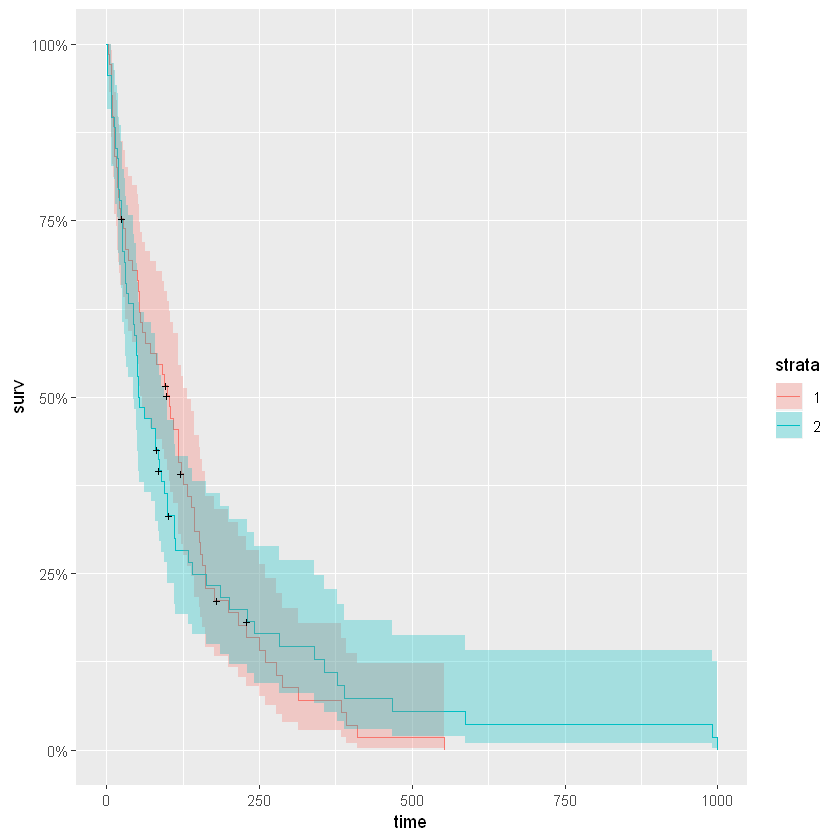

In [9]:
km_trt_fit <- survfit(Surv(time, status) ~ trt, data=veteran) 
autoplot(km_trt_fit)

Und um eine weitere kleine Explorationsdarstellung zu zeigen, werden wir nur ein wenig Daten sammeln, um das Überleben nach Alter zu untersuchen. Zunächst erstellen wir einen neuen LT60 mit einer kategorialen Variablen AG mit den Werten LT60 und GT60 , die jeweils Veteranen beschreiben, die **jünger als 60 Jahre** und **älter als 60 Jahre** sind. 

In [12]:
vet <- mutate(veteran, AG = ifelse((age < 60), "LT60", "OV60"), AG = factor(AG), trt = factor(trt,labels=c("standard","test")), prior = factor(prior,labels=c("N0","Yes")))
head(vet)

trt,celltype,time,status,karno,diagtime,age,prior,AG
standard,squamous,72,1,60,7,69,N0,OV60
standard,squamous,411,1,70,5,64,Yes,OV60
standard,squamous,228,1,60,3,38,N0,LT60
standard,squamous,126,1,60,9,63,Yes,OV60
standard,squamous,118,1,70,11,65,Yes,OV60
standard,squamous,10,1,20,5,49,N0,LT60


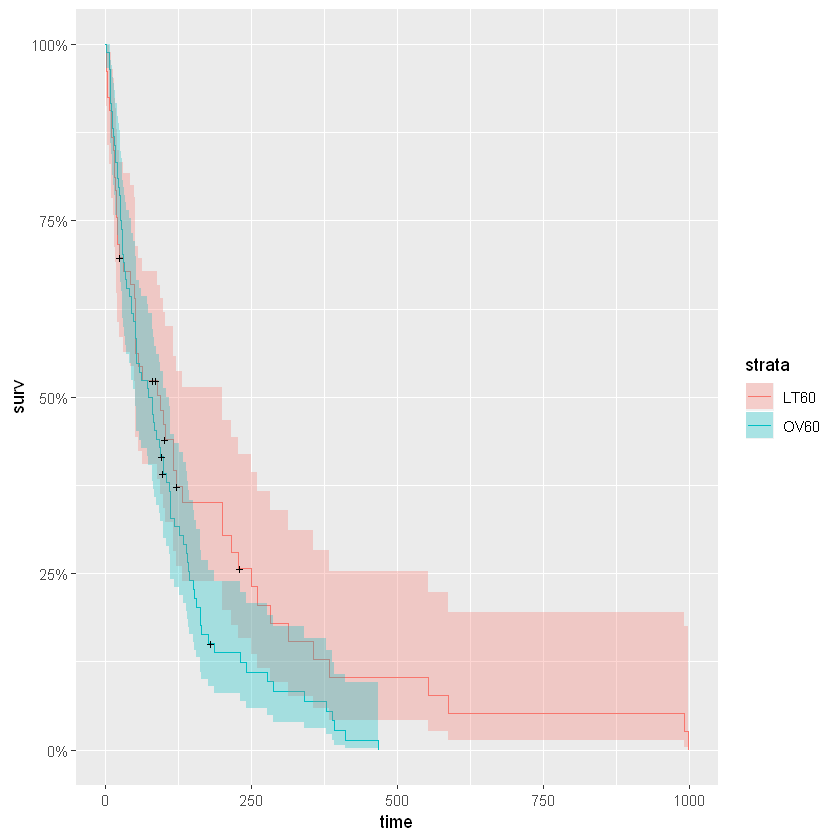

In [13]:
km_AG_fit <- survfit(Surv(time, status) ~ AG, data=vet) 
autoplot(km_AG_fit)

### Cox Proportional Hazards Model

Als Nächstes werden wir ein [Cox-Proportional-Hazards-Modell](https://en.wikipedia.org/wiki/Proportional_hazards_model) anpassen, bei dem alle Kovariaten im Datensatz verwendet werden.

In [14]:
# Fit Cox Model 
cox <- coxph(Surv(time, status) ~ trt + celltype + karno + diagtime + age + prior , data = vet) 
summary(cox)

Call:
coxph(formula = Surv(time, status) ~ trt + celltype + karno + 
    diagtime + age + prior, data = vet)

  n= 137, number of events= 128 

                        coef  exp(coef)   se(coef)      z Pr(>|z|)    
trttest            2.946e-01  1.343e+00  2.075e-01  1.419  0.15577    
celltypesmallcell  8.616e-01  2.367e+00  2.753e-01  3.130  0.00175 ** 
celltypeadeno      1.196e+00  3.307e+00  3.009e-01  3.975 7.05e-05 ***
celltypelarge      4.013e-01  1.494e+00  2.827e-01  1.420  0.15574    
karno             -3.282e-02  9.677e-01  5.508e-03 -5.958 2.55e-09 ***
diagtime           8.132e-05  1.000e+00  9.136e-03  0.009  0.99290    
age               -8.706e-03  9.913e-01  9.300e-03 -0.936  0.34920    
priorYes           7.159e-02  1.074e+00  2.323e-01  0.308  0.75794    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                  exp(coef) exp(-coef) lower .95 upper .95
trttest              1.3426     0.7448    0.8939    2.0166
celltypesmallcell    2.3669    

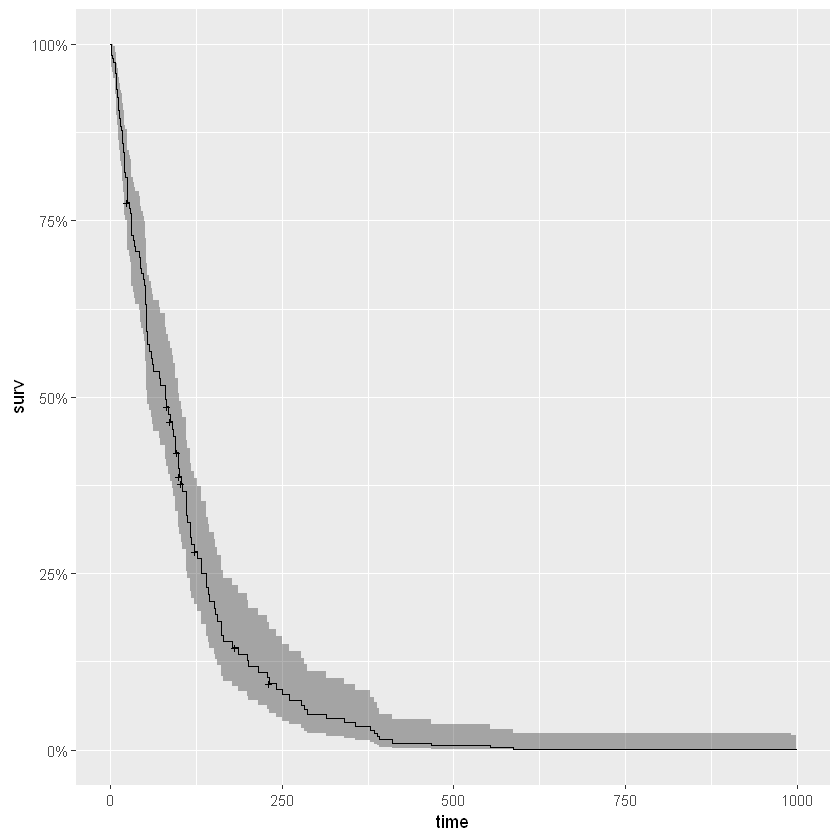

In [16]:
cox_fit <- survfit(cox) 
# plot(cox_fit, main = "cph model", xlab="Days") 
autoplot(cox_fit)

Beachten Sie, dass das Modell kleine Zelltypen, Adenozelltypen und Karno als *signifikant* kennzeichnet. Bei der Interpretation dieser Ergebnisse ist jedoch Vorsicht geboten. Während das Modell des Cox Proportional Hazard als „robust“ eingestuft wird, würde eine sorgfältige Analyse die dem Modell zugrunde liegenden Annahmen überprüfen. Das Cox-Modell geht beispielsweise davon aus, dass sich die Kovariaten nicht mit der Zeit ändern. In einer [Vignette](https://cran.r-project.org/web/packages/survival/vignettes/timedep.pdf), die dem survival Therneau beiliegt, zeigen Crowson und Atkinson, dass der [Karnofsky-Score](https://de.wikipedia.org/wiki/Karnofsky-Index) (karno) tatsächlich zeitabhängig ist, sodass die Annahmen für das Cox-Modell nicht erfüllt werden. Die Vignettenautoren präsentieren eine Strategie für den Umgang mit zeitabhängigen Kovariaten.

Datenwissenschaftler, die mit der Berechnung von ROC-Kurven zur Bewertung der Modellleistung vertraut sind, sollten sich für die Konkordanzstatistik interessieren. Die Dokumentation für die Funktion survConcordance() im survival definiert Konkordanz als „die Wahrscheinlichkeit der Übereinstimmung für zwei zufällig ausgewählte Beobachtungen, wobei in diesem Fall Übereinstimmung bedeutet, dass die Beobachtung mit der kürzeren Überlebenszeit der beiden auch den höheren Risikowert aufweist . Der Prädiktor (oder die Risikokennzahl) ist häufig das Ergebnis eines Cox-Modells oder einer anderen Regression. Für kontinuierliche Kovariaten entspricht die Konkordanz der Tau von Kendall und für logistische Regression der Fläche unter der ROC-Kurve."

Um die Verwendung des survival zusammen mit ggplot2 und ggfortify, passen wir additive [Aalen-Regressionsmodell](https://pdfs.semanticscholar.org/e93c/b08425f936df5f449afa383bfb4564739309.pdf) für zensierte Daten an die Veteranendaten an. In der Dokumentation heißt es: „Das Aalen-Modell geht davon aus, dass die kumulative Gefahr H (t) für ein Subjekt ausgedrückt werden kann als *a(t) + X B(t)*, wobei a(t) ein zeitabhängiger Abfangterm ist, X ist Vektor der Kovariaten für das Subjekt (möglicherweise zeitabhängig) und B(t) ist eine zeitabhängige Koeffizientenmatrix. “

Die Diagramme zeigen, wie sich die Auswirkungen der Kovariaten im Laufe der Zeit ändern. Beachten Sie den steilen Abhang und dann die abrupte Änderung des Karno-Abhangs.

In [20]:
aa_fit <- aareg(Surv(time, status) ~ trt + celltype +
                 karno + diagtime + age + prior , 
                 data = vet)
aa_fit

Call:
aareg(formula = Surv(time, status) ~ trt + celltype + karno + 
    diagtime + age + prior, data = vet)

  n= 137 
    75 out of 97 unique event times used

                      slope      coef se(coef)      z        p
Intercept          0.083400  3.81e-02 1.09e-02  3.490 4.79e-04
trttest            0.006730  2.49e-03 2.58e-03  0.967 3.34e-01
celltypesmallcell  0.015000  7.30e-03 3.38e-03  2.160 3.09e-02
celltypeadeno      0.018400  1.03e-02 4.20e-03  2.450 1.42e-02
celltypelarge     -0.001090 -6.21e-04 2.71e-03 -0.229 8.19e-01
karno             -0.001180 -4.37e-04 8.77e-05 -4.980 6.28e-07
diagtime          -0.000243 -4.92e-05 1.64e-04 -0.300 7.65e-01
age               -0.000246 -6.27e-05 1.28e-04 -0.491 6.23e-01
priorYes           0.003300  1.54e-03 2.86e-03  0.539 5.90e-01

Chisq=41.62 on 8 df, p=1.6e-06; test weights=aalen

In [21]:
summary(aa_fit)  # provides a more complete summary of results

$table
                          slope          coef     se(coef)          z
Intercept          0.0834340087  3.807658e-02 1.090360e-02  3.4921114
trttest            0.0067346942  2.494101e-03 2.579635e-03  0.9668426
celltypesmallcell  0.0150155271  7.300549e-03 3.381821e-03  2.1587627
celltypeadeno      0.0184104066  1.028376e-02 4.195521e-03  2.4511281
celltypelarge     -0.0010918822 -6.210722e-04 2.711566e-03 -0.2290455
karno             -0.0011833856 -4.368915e-04 8.768774e-05 -4.9823553
diagtime          -0.0002426408 -4.919161e-05 1.642118e-04 -0.2995620
age               -0.0002459319 -6.273564e-05 1.277592e-04 -0.4910458
priorYes           0.0032957829  1.538811e-03 2.856993e-03  0.5386122
                             p
Intercept         4.792184e-04
trttest           3.336227e-01
celltypesmallcell 3.086858e-02
celltypeadeno     1.424093e-02
celltypelarge     8.188335e-01
karno             6.281497e-07
diagtime          7.645112e-01
age               6.233941e-01
priorYes      

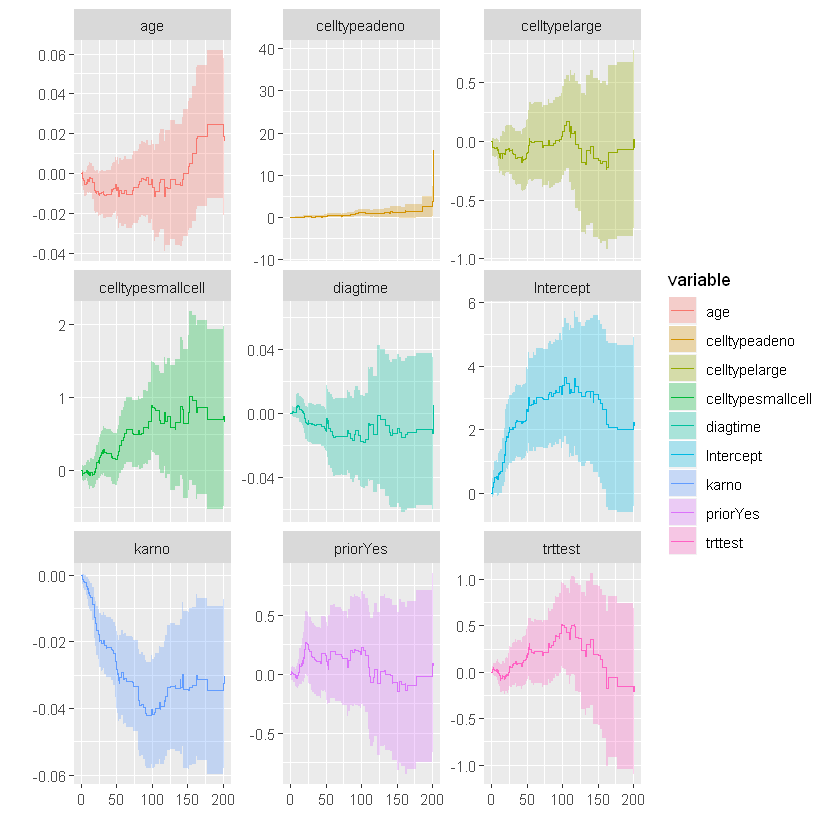

In [22]:
autoplot(aa_fit)


Herzlichen Glückwunsch! Sie sind mit Lektion 62. fertig!